In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
#from gprofiler import GProfiler
#import loompy as lp
#import rpy2.rinterface_lib.callbacks
import logging
#import scrublet as scr
#from rpy2.robjects import pandas2ri
#import anndata2ri
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc
#import keras
import tensorflow as tf
from time import time                                                       
import sys

2023-02-09 13:07:12.751408: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-09 13:07:12.755132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 13:07:12.755142: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
adata = sc.read("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/adata_annTcell.h5ad")

In [4]:
adata.X = adata.layers['raw']

In [5]:
adata2 = adata.copy()

sc.pp.normalize_per_cell(adata2, counts_per_cell_after=1e4)
sc.pp.log1p(adata2)

In [7]:
sc.pp.highly_variable_genes(adata2,n_top_genes=4000,subset=True,inplace=True)

In [8]:
sc.pp.scale(adata2,max_value=6)

In [10]:
save_dir="/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/Integrated"
adata2=desc.train(adata2,
        dims=[adata2.shape[1],64,32],
        tol=0.001,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[0.3,0.4,0.5,0.6,0.7,0.8],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne=False,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=30, #for reproducible, only use 1 cpu
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=True)

Start to process resolution= 0.3
The number of cpu in your computer is 48

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1


2023-02-09 13:08:24.649671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 13:08:24.654045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-09 13:08:24.654085: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-09 13:08:24.654117: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (node7): /proc/driver/nvidia/version does not exist


Epoch 1/50
351/351 [==============================] - 2s 5ms/step - loss: 0.2168
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.2103
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 0.2045
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.2012
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1986
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1965
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1948
Epoch 8/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1935
Epoch 9/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1924
Epoch 10/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1914
Epoch 11/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1905
Epoch 12/50
351/351 [==============================] - 2s 5ms/step - loss: 0.1898
Epoch 13/50
351/351 [====

In [11]:
%matplotlib inline

In [19]:
adata.obs = adata2.obs

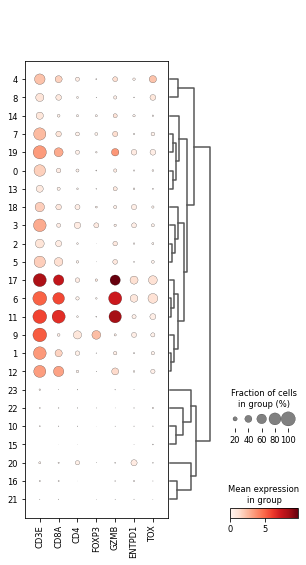

In [23]:
sc.pl.dotplot(adata, ['CD3E','CD8A',"CD4","FOXP3","GZMB","ENTPD1","TOX"], groupby='desc_0.7', dendrogram=True)

In [29]:
adataCD8 = adata[adata.obs['desc_0.7'].isin([12,1,11,6,17,5,2,19,4,7]),:]

In [30]:
adataCD8.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/adata_annTcellCD8.h5ad")